In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set() 
import matplotlib.pyplot as plt 
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier 
from xgboost import XGBClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [2]:
Train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
Train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
Train .head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
Train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
Train .isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
Train.shape


(891, 12)

In [10]:
Train.nunique()


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Visulization & Preprocessing

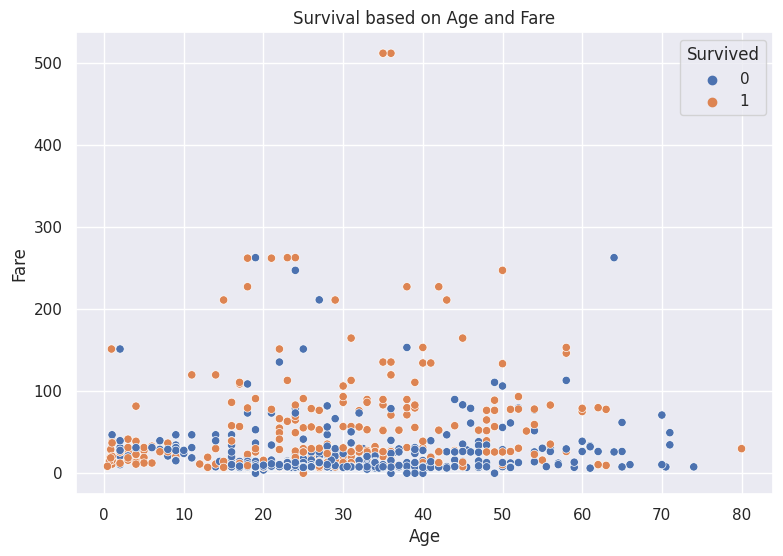

In [11]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=Train, x= "Age", y ="Fare",hue="Survived")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Survival based on Age and Fare")
plt.show()


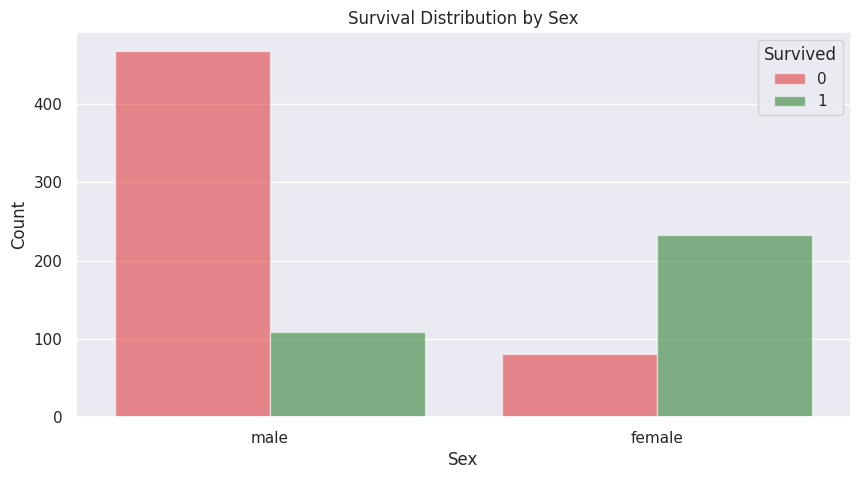

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=Train, x="Sex", hue="Survived", fill=True, palette={0: "red", 1: "green"}, alpha=0.5)
plt.title("Survival Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

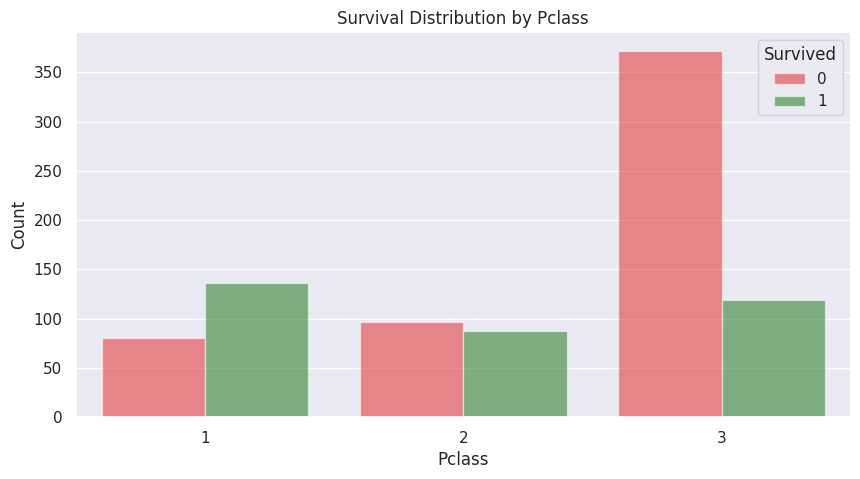

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=Train, x="Pclass", hue="Survived", fill=True, palette={0: "red", 1: "green"}, alpha=0.5)
plt.title("Survival Distribution by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

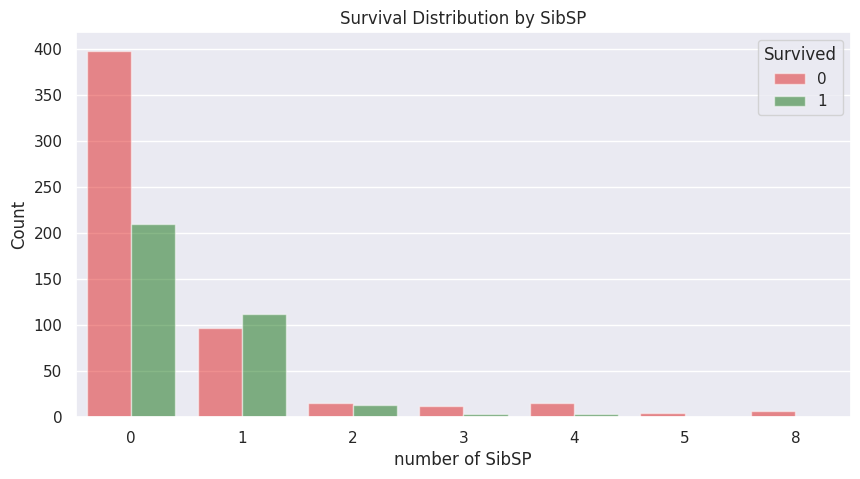

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data=Train, x="SibSp", hue="Survived", fill=True, palette={0: "red", 1: "green"}, alpha=0.5)
plt.title("Survival Distribution by SibSP")
plt.xlabel("number of SibSP")
plt.ylabel("Count")
plt.show()

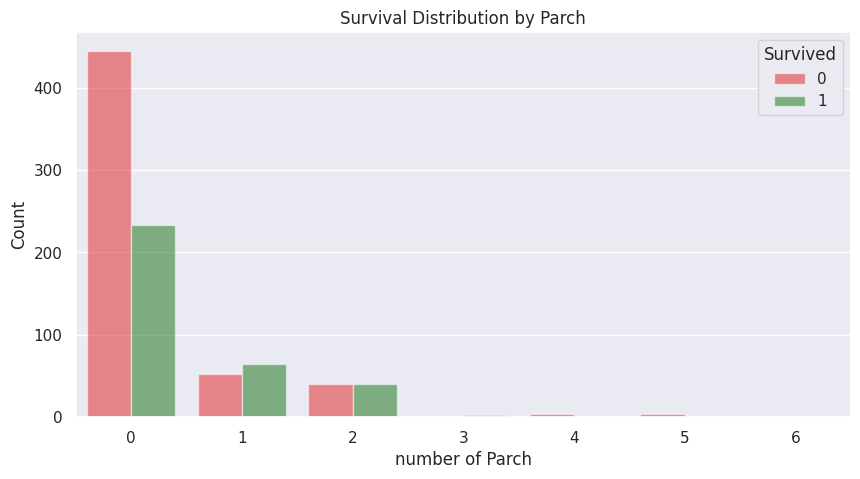

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=Train, x="Parch", hue="Survived", fill=True, palette={0: "red", 1: "green"}, alpha=0.5)
plt.title("Survival Distribution by Parch")
plt.xlabel("number of Parch")
plt.ylabel("Count")
plt.show()

In [16]:
Train["Family_Size"] = Train["SibSp"] + Train["Parch"] + 1

Train[["SibSp", "Parch", "Family_Size"]].head()

,SibSp,Parch,Family_Size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


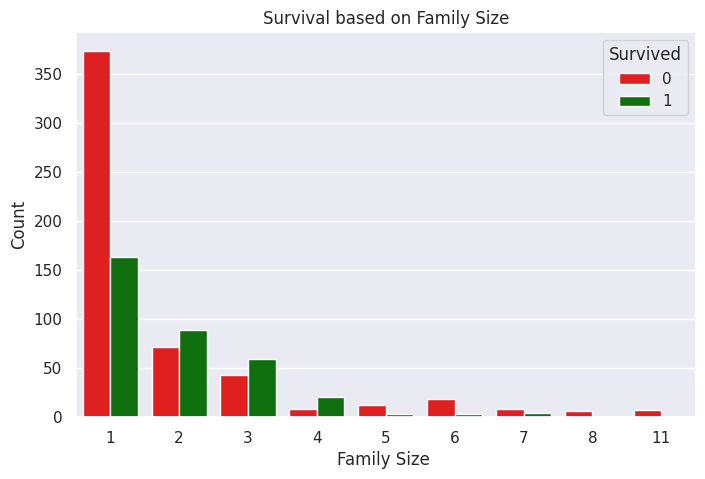

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=Train, x="Family_Size", hue="Survived", palette={0: "red", 1: "green"})
plt.title("Survival based on Family Size")
plt.xlabel("Family Size ")
plt.ylabel("Count")
plt.show()

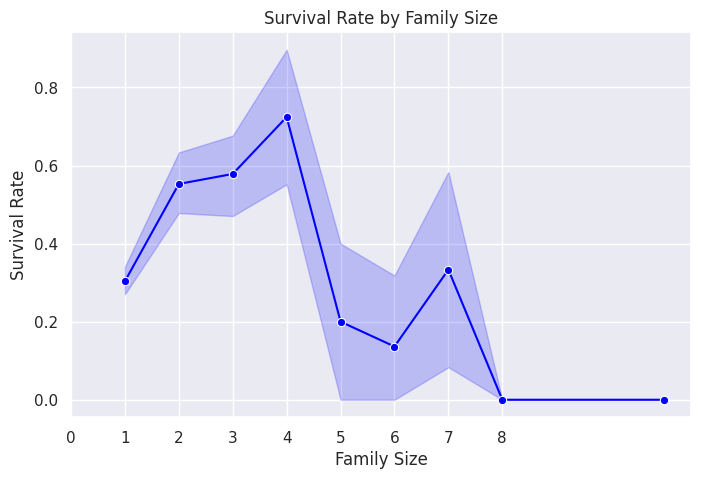

In [19]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=Train, x="Family_Size", y="Survived", marker="o", color="blue")
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.xticks(range(Train["Family_Size"].nunique()))
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

Train["Age"].fillna(Train["Age"].median(), inplace=True)  

encoder = LabelEncoder()
Train["Sex"] = encoder.fit_transform(Train["Sex"])
Train["Embarked"].fillna("S", inplace=True)  
Train["Embarked"] = encoder.fit_transform(Train["Embarked"])

Train.drop(["Name", "Ticket", "PassengerId", "Cabin"], axis=1, inplace=True)

In [21]:
Train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,1


# Build Model

In [22]:
train_data = Train.drop('Survived', axis=1)

target = Train['Survived']

In [23]:
Train["AgeGroup"] = pd.cut(train_data["Age"], bins=[0, 18, 40, 60, 100], labels=[0, 1, 2, 3])

train_data.drop(["Age"], axis=1, inplace=True)

scaler = StandardScaler()
train_data["Fare"] = scaler.fit_transform(train_data[["Fare"]])
train_data["AgeGroup"] = Train["AgeGroup"].astype(int)


In [24]:
train_data


,Pclass,Sex,SibSp,Parch,Fare,Embarked,Family_Size,AgeGroup
0,3,1,1,0,-0.502445,2,2,1
1,1,0,1,0,0.786845,0,2,1
2,3,0,0,0,-0.488854,2,1,1
3,1,0,1,0,0.420730,2,2,1
4,3,1,0,0,-0.486337,2,1,1
...,...,...,...,...,...,...,...,...
886,2,1,0,0,-0.386671,2,1,1
887,1,0,0,0,-0.044381,2,1,1
888,3,0,1,2,-0.176263,2,4,1
889,1,1,0,0,-0.044381,0,1,1


In [25]:
target


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


======== Kernel: LINEAR ========

=== LINEAR Kernel Classification Report (Train) ===
              precision    recall  f1-score   support

          -1       0.92      0.85      0.88       192
           1       0.87      0.93      0.90       208

    accuracy                           0.89       400
   macro avg       0.90      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400


=== LINEAR Kernel Classification Report (Test) ===
              precision    recall  f1-score   support

          -1       0.98      0.88      0.92        56
           1       0.86      0.98      0.91        44

    accuracy                           0.92       100
   macro avg       0.92      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



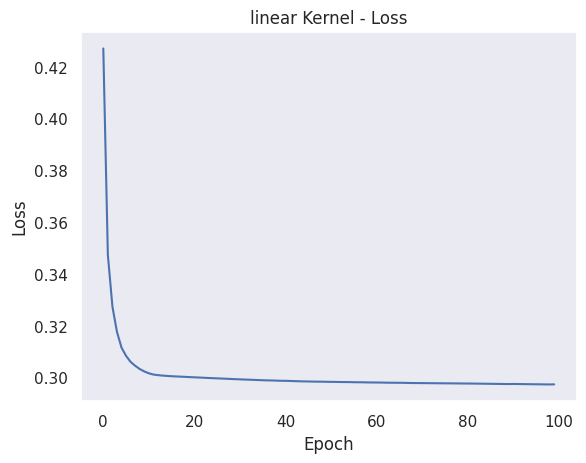

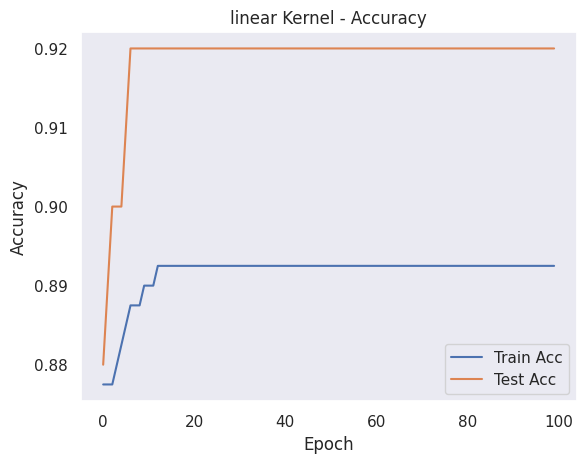

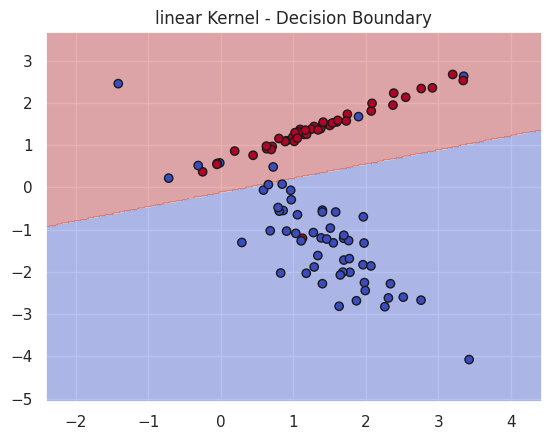


======== Kernel: QUADRATIC ========

=== QUADRATIC Kernel Classification Report (Train) ===
              precision    recall  f1-score   support

          -1       0.92      0.85      0.88       192
           1       0.87      0.93      0.90       208

    accuracy                           0.89       400
   macro avg       0.90      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400


=== QUADRATIC Kernel Classification Report (Test) ===
              precision    recall  f1-score   support

          -1       0.98      0.88      0.92        56
           1       0.86      0.98      0.91        44

    accuracy                           0.92       100
   macro avg       0.92      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



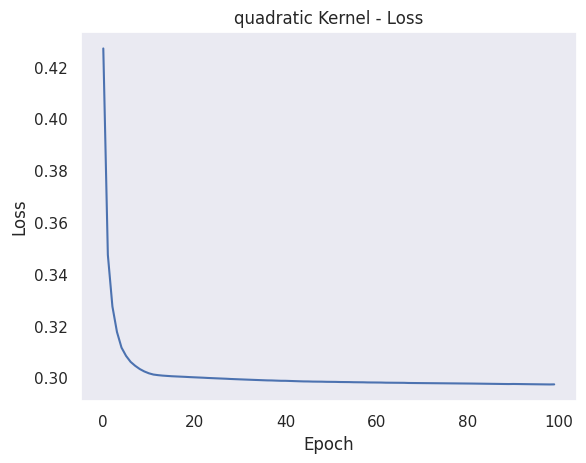

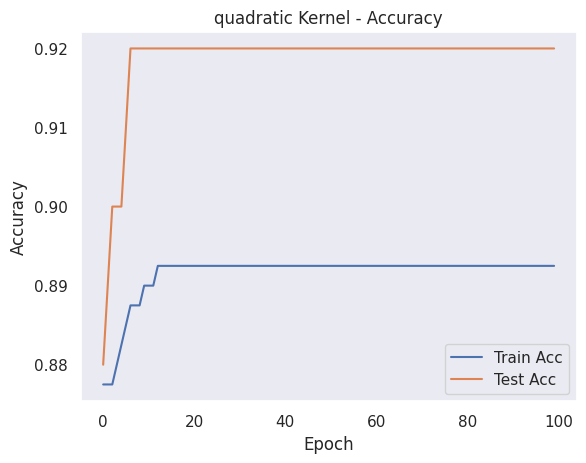

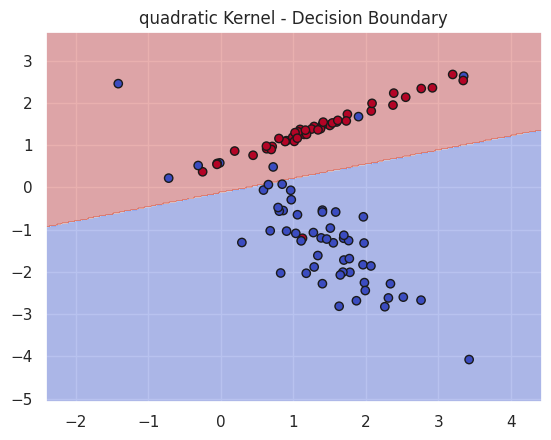


======== Kernel: POLY2 ========

=== POLY2 Kernel Classification Report (Train) ===
              precision    recall  f1-score   support

          -1       0.92      0.85      0.88       192
           1       0.87      0.93      0.90       208

    accuracy                           0.89       400
   macro avg       0.90      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400


=== POLY2 Kernel Classification Report (Test) ===
              precision    recall  f1-score   support

          -1       0.98      0.88      0.92        56
           1       0.86      0.98      0.91        44

    accuracy                           0.92       100
   macro avg       0.92      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



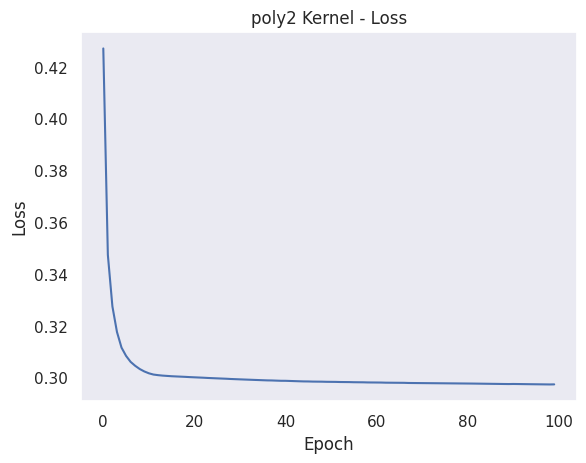

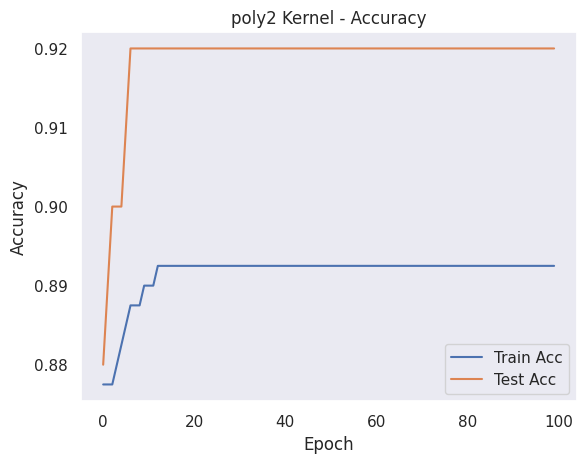

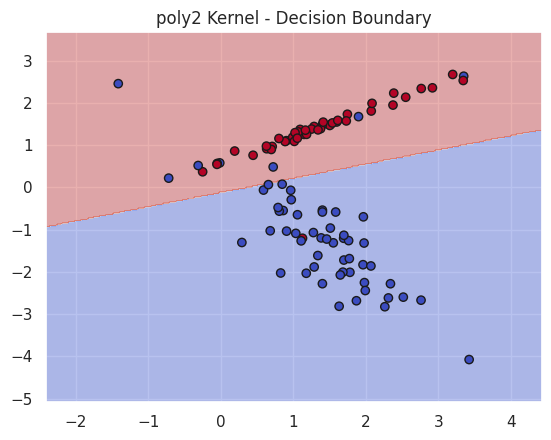


======== Kernel: RBF ========

=== RBF Kernel Classification Report (Train) ===
              precision    recall  f1-score   support

          -1       0.92      0.85      0.88       192
           1       0.87      0.93      0.90       208

    accuracy                           0.89       400
   macro avg       0.90      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400


=== RBF Kernel Classification Report (Test) ===
              precision    recall  f1-score   support

          -1       0.98      0.88      0.92        56
           1       0.86      0.98      0.91        44

    accuracy                           0.92       100
   macro avg       0.92      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



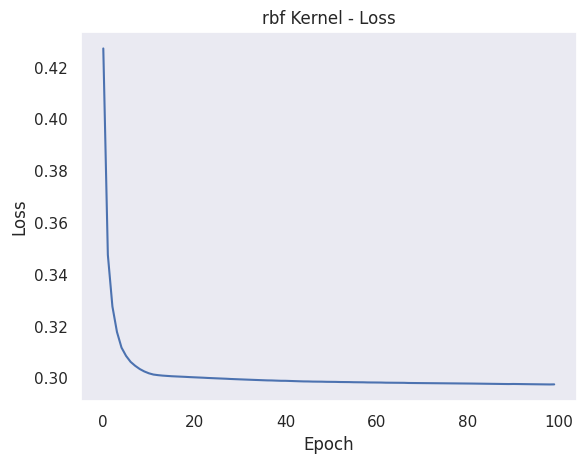

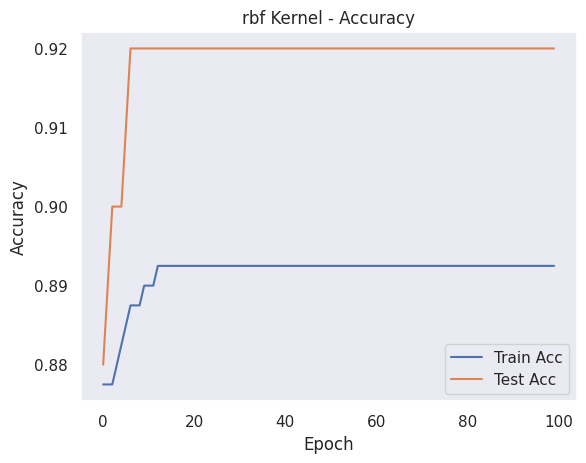

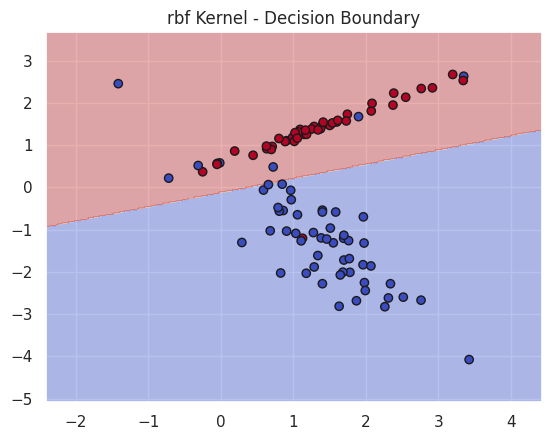

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

train_data,target = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                                 n_clusters_per_class=1, flip_y=0.1, class_sep=1.5, random_state=42)

target = np.where(target == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2, random_state=42)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

class KernelSVM:
    def __init__(self, kernel='linear', c=1, gamma=1, learning_rate=0.001, lambda_param=0.01, n_iters=100):
        self.kernel = kernel
        self.c = c
        self.gamma = gamma
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.b = 0
        self.w = None
        self.losses = []
        self.train_accs = []
        self.test_accs = []

    def _kernel(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'quadratic':
            return (np.dot(x1, x2) + self.c) ** 2
        elif self.kernel == 'poly2':
            return np.dot(x1, x2) ** 2
        elif self.kernel == 'rbf':
            return np.exp(-self.gamma * np.linalg.norm(x1 - x2) ** 2)
        else:
            raise ValueError(f"Unknown kernel: {self.kernel}")

    def _get_loss(self, X, y):
        distances = 1 - y * (np.dot(X, self.w) + self.b)
        hinge_loss = np.maximum(0, distances)
        return (self.lambda_param / 2 * np.dot(self.w, self.w)) + np.mean(hinge_loss)

    def fit(self, X, y, X_val, y_val):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - y_[idx] * x_i)
                    self.b += self.lr * y_[idx]

            self.losses.append(self._get_loss(X, y_))
            self.train_accs.append(accuracy_score(y_, self.predict(X)))
            self.test_accs.append(accuracy_score(np.where(y_val <= 0, -1, 1), self.predict(X_val)))

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.show()

def evaluate_and_visualize(model, X_train, y_train, X_test, y_test, kernel_name):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f"\n=== {kernel_name.upper()} Kernel Classification Report (Train) ===")
    print(classification_report(y_train, y_pred_train))
    print(f"\n=== {kernel_name.upper()} Kernel Classification Report (Test) ===")
    print(classification_report(y_test, y_pred_test))

    plt.plot(model.losses)
    plt.title(f'{kernel_name} Kernel - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

    plt.plot(model.train_accs, label='Train Acc')
    plt.plot(model.test_accs, label='Test Acc')
    plt.title(f'{kernel_name} Kernel - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    plot_decision_boundary(model, X_test, y_test, f'{kernel_name} Kernel - Decision Boundary')

kernels = ['linear', 'quadratic', 'poly2', 'rbf']
for kernel in kernels:
    print(f"\n======== Kernel: {kernel.upper()} ========")
    model = KernelSVM(kernel=kernel, n_iters=100)
    model.fit(X_train, y_train, X_test, y_test)
    evaluate_and_visualize(model, X_train, y_train, X_test, y_test, kernel)
